In [1]:
import pandas as pd
import numpy as np


In [2]:
gr_data = pd.read_csv('./1. Original_df/GoodReads.Best_Books_Ever 2.csv')

pd.set_option('display.max_columns', 30)
display(gr_data.head(3), gr_data.shape)

,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9.78044E+12,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,Scholastic Press,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09
1,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9.78044E+12,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,Scholastic Inc.,09/28/04,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38
2,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,1E+13,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,NaN,324,Harper Perennial Modern Classics,05/23/06,07-11-1960,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",2269402,23328,NaN


(52478, 23)

# Data Cleaning

## Column Names


In [3]:
# Names in lower case
cols = []
for c in gr_data.columns:
    cols.append(c.lower())

gr_data.columns = cols
gr_data.columns

Index(['title', 'series', 'author', 'rating', 'description', 'language',
       'isbn', 'genres', 'characters', 'bookformat', 'edition', 'pages',
       'publisher', 'publishdate', 'firstpublishdate', 'awards', 'numratings',
       'ratingsbystars', 'likedpercent', 'setting', 'bbescore', 'bbevotes',
       'price'],
      dtype='object')

In [4]:
# Renaming columns
gr_data = gr_data.rename(columns={'bookformat':'book_format',
                                 'publishdate':'publish_date',
                                 'firstpublishdate':'first_publish_date',
                                 'numratings':'num_ratings',
                                 'ratingsbystars':'rating_by_stars',
                                 'likedpercent': 'liked_perc',
                                 'bbescore':'bbe_score',
                                 'bbevotes':'bbe_votes'})

gr_data.columns

Index(['title', 'series', 'author', 'rating', 'description', 'language',
       'isbn', 'genres', 'characters', 'book_format', 'edition', 'pages',
       'publisher', 'publish_date', 'first_publish_date', 'awards',
       'num_ratings', 'rating_by_stars', 'liked_perc', 'setting', 'bbe_score',
       'bbe_votes', 'price'],
      dtype='object')

In [5]:
pd.set_option('display.max_columns', 30)
gr_data.head(1)

,title,series,author,rating,description,language,isbn,genres,characters,book_format,edition,pages,publisher,publish_date,first_publish_date,awards,num_ratings,rating_by_stars,liked_perc,setting,bbe_score,bbe_votes,price
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9.78044E+12,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,Scholastic Press,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09


## Column types

In [6]:
gr_data.dtypes 

title                  object
series                 object
author                 object
rating                float64
description            object
language               object
isbn                   object
genres                 object
characters             object
book_format            object
edition                object
pages                  object
publisher              object
publish_date           object
first_publish_date     object
awards                 object
num_ratings             int64
rating_by_stars        object
liked_perc            float64
setting                object
bbe_score               int64
bbe_votes               int64
price                  object
dtype: object

In [7]:
#publish_date first_publish_date #
# Converting object columns to numerical
gr_data['pages'] = pd.to_numeric(gr_data['pages'], errors = 'coerce')
gr_data['price'] = pd.to_numeric(gr_data['price'], errors = 'coerce')

# Converting object columns to datetime
#gr_data['publish_date'] = pd.to_datetime(gr_data['publish_date'])
#gr_data['first_publish_date'] = pd.to_datetime(gr_data['first_publish_date'])


## Dealing with each column

In [8]:
gr_data.columns

Index(['title', 'series', 'author', 'rating', 'description', 'language',
       'isbn', 'genres', 'characters', 'book_format', 'edition', 'pages',
       'publisher', 'publish_date', 'first_publish_date', 'awards',
       'num_ratings', 'rating_by_stars', 'liked_perc', 'setting', 'bbe_score',
       'bbe_votes', 'price'],
      dtype='object')

### Author

In [9]:
gr_data['author'].head(20)

0                                       Suzanne Collins
1             J.K. Rowling, Mary GrandPré (Illustrator)
2                                            Harper Lee
3             Jane Austen, Anna Quindlen (Introduction)
4                                       Stephenie Meyer
5                       Markus Zusak (Goodreads Author)
6     George Orwell, Russell Baker (Preface), C.M. W...
7              C.S. Lewis, Pauline Baynes (Illustrator)
8                                        J.R.R. Tolkien
9                                     Margaret Mitchell
10                        John Green (Goodreads Author)
11                                        Douglas Adams
12                                     Shel Silverstein
13    Emily Brontë, Richard J. Dunn (Editor), David ...
14                         Dan Brown (Goodreads Author)
15                                        Arthur Golden
16        Oscar Wilde, Jeffrey Eugenides (Introduction)
17    Lewis Carroll, John Tenniel (Illustrator),

In [10]:
import re

# Extract author name and collaborators
gr_data['author'] = gr_data['author'].astype(str)
# Add to new 'other collabs' columns all names after the first ',' or '(' (before it's the writer)
gr_data['other_collabs'] = gr_data['author'].apply(lambda x: ', '.join(re.split(',|\(|:', x)[1:]).strip())
gr_data['author'] = gr_data['author'].apply(lambda x: re.split(',|\(|:', x)[0].strip())


In [11]:
# Check result
gr_data[['author','other_collabs']].head(20)

,author,other_collabs
0,Suzanne Collins,
1,J.K. Rowling,"Mary GrandPré , Illustrator)"
2,Harper Lee,
3,Jane Austen,"Anna Quindlen , Introduction)"
4,Stephenie Meyer,
5,Markus Zusak,Goodreads Author)
6,George Orwell,"Russell Baker , Preface), C.M. Woodhouse , In..."
7,C.S. Lewis,"Pauline Baynes , Illustrator)"
8,J.R.R. Tolkien,
9,Margaret Mitchell,


In [12]:
gr_data['author'].value_counts()

James Patterson    97
Nora Roberts       94
Stephen King       94
Agatha Christie    84
Erin Hunter        81
                   ..
Adele Westbrook     1
Clara Ng            1
Maria Krüger        1
Scott Thomas        1
Misty Moncur        1
Name: author, Length: 23196, dtype: int64

In [13]:
gr_data['author'].nunique()

23196

In [14]:
gr_data.columns

Index(['title', 'series', 'author', 'rating', 'description', 'language',
       'isbn', 'genres', 'characters', 'book_format', 'edition', 'pages',
       'publisher', 'publish_date', 'first_publish_date', 'awards',
       'num_ratings', 'rating_by_stars', 'liked_perc', 'setting', 'bbe_score',
       'bbe_votes', 'price', 'other_collabs'],
      dtype='object')

### Rating

In [15]:
# Float values
gr_data['rating'][50:60]

50    4.22
51    4.30
52    3.77
53    3.91
54    3.85
55    4.09
56    3.89
57    4.08
58    3.81
59    4.30
Name: rating, dtype: float64

In [16]:
# Checking values
gr_data['rating'].value_counts(dropna=False)

4.00    923
5.00    853
4.17    727
4.06    709
4.05    703
       ... 
2.84      1
2.39      1
1.92      1
1.99      1
2.25      1
Name: rating, Length: 261, dtype: int64

In [17]:
# Minimum rating 0 and maximum 5
gr_data['rating'].describe()

count    52478.000000
mean         4.021878
std          0.367146
min          0.000000
25%          3.820000
50%          4.030000
75%          4.230000
max          5.000000
Name: rating, dtype: float64

### Description

In [18]:
gr_data['description'].head(20)

0     WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...
1     There is a door at the end of a silent corrido...
2     The unforgettable novel of a childhood in a sl...
3     Alternate cover edition of ISBN 9780679783268S...
4     About three things I was absolutely positive.\...
5     Librarian's note: An alternate cover edition c...
6     Librarian's note: There is an Alternate Cover ...
7     Journeys to the end of the world, fantastic cr...
8     This four-volume, boxed set contains J.R.R. To...
9     Scarlett O'Hara, the beautiful, spoiled daught...
10    Despite the tumor-shrinking medical miracle th...
11    Seconds before the Earth is demolished to make...
12    "Once there was a tree...and she loved a littl...
13    You can find the redesigned cover of this edit...
14    ISBN 9780307277671 moved to this edition.While...
15    A literary sensation and runaway bestseller, t...
16    Written in his distinctively dazzling manner, ...
17    "I can't explain myself, I'm afraid, sir,"

In [19]:
gr_data['description'][14]

'ISBN 9780307277671 moved to this edition.While in Paris, Harvard symbologist Robert Langdon is awakened by a phone call in the dead of the night. The elderly curator of the Louvre has been murdered inside the museum, his body covered in baffling symbols. As Langdon and gifted French cryptologist Sophie Neveu sort through the bizarre riddles, they are stunned to discover a trail of clues hidden in the works of Leonardo da Vinci—clues visible for all to see and yet ingeniously disguised by the painter.Even more startling, the late curator was involved in the Priory of Sion—a secret society whose members included Sir Isaac Newton, Victor Hugo, and Da Vinci—and he guarded a breathtaking historical secret. Unless Langdon and Neveu can decipher the labyrinthine puzzle—while avoiding the faceless adversary who shadows their every move—the explosive, ancient truth will be lost forever.'

In [20]:
# Checking NaN values (no description)
nan_descr = gr_data[gr_data['description'].isna()]
display(nan_descr.head(3), nan_descr.shape)

,title,series,author,rating,description,language,isbn,genres,characters,book_format,edition,pages,publisher,publish_date,first_publish_date,awards,num_ratings,rating_by_stars,liked_perc,setting,bbe_score,bbe_votes,price,other_collabs
291,Leaves of Grass,NaN,Walt Whitman,4.12,NaN,English,1E+13,"['Poetry', 'Classics', 'Fiction', 'Literature'...",[],Paperback,NaN,624.0,Simon Schuster,08-01-2006,10/28/92,[],89814,"['40667', '27858', '14878', '4260', '2151']",93.0,"['New York City, New York (United States)', 'W...",43537,591,NaN,
680,Howl and Other Poems,NaN,Allen Ginsberg,4.13,NaN,English,9.78087E+12,"['Poetry', 'Classics', 'Fiction', 'American', ...",[],Hardcover,NaN,56.0,City Lights,01-01-2001,10/28/56,[],93609,"['42231', '29693', '15146', '4295', '2244']",93.0,['United States of America'],11078,157,10.53,"William Carlos Williams , Introduction)"
683,The Book of Mormon: Another Testament of Jesus...,NaN,Joseph Smith Jr.,4.34,NaN,English,9.78097E+12,"['Religion', 'Nonfiction', 'Lds', 'Church', 'S...",[],Paperback,2013 Edition,531.0,The Church of Jesus Christ of Latter-day Saints,10/28/13,03-01-1930,[],75222,"['58923', '2290', '2811', '2934', '8264']",85.0,[],11029,121,2.90,Translator)


(1338, 24)

### Language

In [21]:
gr_data['language'].unique()

array(['English', 'French', 'German', 'Persian', 'Arabic', nan, 'Spanish',
       'Multiple languages', 'Portuguese', 'Indonesian', 'Turkish',
       'Polish', 'Bulgarian', 'Tamil', 'Japanese', 'Romanian', 'Italian',
       'French, Middle (ca.1400-1600)', 'Norwegian', 'Urdu', 'Dutch',
       'Finnish', 'Marathi', 'Chinese', 'Swedish', 'Icelandic',
       'Malayalam', 'Croatian', 'Estonian', 'Greek, Modern (1453-)',
       'Russian', 'Kurdish', 'Danish', 'Hindi', 'Filipino; Pilipino',
       'Serbian', 'Bengali', 'Malay', 'Catalan; Valencian', 'Czech',
       'Vietnamese', 'Armenian', 'Georgian', 'Kannada', 'Korean',
       'Nepali', 'Slovak', 'Telugu', 'Hungarian',
       'English, Middle (1100-1500)', 'Azerbaijani', 'Farsi',
       'Lithuanian', 'Ukrainian', 'Bokmål, Norwegian; Norwegian Bokmål',
       'Iranian (Other)', 'Faroese', 'Basque', 'Macedonian', 'Maltese',
       'Gujarati', 'Amharic', 'Aromanian; Arumanian; Macedo-Romanian',
       'Assamese', 'Panjabi; Punjabi', 'Albania

In [22]:
gr_data['language'].value_counts()

English                                  42661
Arabic                                    1038
Spanish                                    687
French                                     579
German                                     528
                                         ...  
Aromanian; Arumanian; Macedo-Romanian        1
Basque                                       1
Faroese                                      1
Iranian (Other)                              1
Norwegian Nynorsk; Nynorsk, Norwegian        1
Name: language, Length: 81, dtype: int64

In [23]:
# Checking null values
gr_data['language'].isna().sum()

3806

In [24]:
nan_lang = gr_data[gr_data['language'].isna()]
nan_lang.head()

,title,series,author,rating,description,language,isbn,genres,characters,book_format,edition,pages,publisher,publish_date,first_publish_date,awards,num_ratings,rating_by_stars,liked_perc,setting,bbe_score,bbe_votes,price,other_collabs
503,Mistress Suffragette,NaN,Diana Forbes,4.34,\n A young woman without prospects at a ball ...,NaN,B06XG3G2TF,"['Fiction', 'Novels', 'Historical Fiction', 'D...",[],Kindle Edition,NaN,333.0,Penmore Press LLC,03-05-2017,NaN,[],7647,"['3553', '3422', '466', '140', '66']",97.0,[],18215,203,NaN,Goodreads Author)
570,Invisible Monsters,NaN,Chuck Palahniuk,3.98,She's a catwalk model who has everything: a bo...,NaN,9.78039E+12,"['Fiction', 'Contemporary', 'Thriller', 'Myste...","['Shannon McFarland', 'Brandy Alexander', 'Evi...",Paperback,NaN,304.0,W. W. Norton Company,05-01-2018,09/17/99,[],128254,"['47150', '45163', '25392', '7675', '2874']",92.0,[],15186,181,6.53,Goodreads Author)
645,House of Sand and Fog,NaN,Andre Dubus III,3.85,In this “page-turner with a beating heart” (Bo...,NaN,9.78039E+12,"['Fiction', 'Contemporary', 'Literary Fiction'...","['Colonel Behrani', 'Kathy Nicolo', 'Sheriff L...",Paperback,NaN,368.0,W. W. Norton Company,10-02-2018,10/28/99,['Los Angeles Times Book Prize Nominee for Fic...,125230,"['38141', '46256', '28560', '8447', '3826']",90.0,['California (United States)'],12262,176,2.86,
703,The Awakening: Fate in Motion,NaN,Suzanne Boisvert,4.31,"Exiled from Earth thousands of years ago, Sar ...",NaN,B07GNSZH8M,"['Contemporary', 'Drama', 'Book Club', 'Fictio...",[],Kindle Edition,NaN,331.0,NaN,09/15/18,NaN,[],6682,"['3045', '3031', '329', '206', '71']",96.0,[],10611,118,NaN,Goodreads Author)
751,"One Fish, Two Fish, Red Fish, Blue Fish",NaN,Dr. Seuss,4.13,One Fish Two Fish Red Fish Blue Fish is a 1960...,NaN,9.78001E+12,"['Childrens', 'Picture Books', 'Fiction', 'Cla...",[],Hardcover,NaN,64.0,Harper Collins Children's Books,10-06-2003,10/28/60,[],165623,"['81438', '41473', '30307', '8407', '3998']",93.0,[],9731,163,NaN,Reader)


In [25]:
# Import 'langid' --> identifying language from 'description' or 'title' column

import langid

# Define the language dictionary
language_dict = {
    
    'ar': 'Arabic',
    'en': 'English',
    'fr': 'French',
    'de': 'German',
    'es': 'Spanish',
    'it': 'Italian',
    'pt': 'Portuguese',
    'nl': 'Dutch',
    'sv': 'Swedish',
    'pl': 'Polish',
    'sl': 'Slovenian',
    'bs': 'Bosnian',
    'hr': 'Croatian',
    'sr': 'Serbian',
    'sq': 'Albanian',
    'mk': 'Macedonian',
    'ro': 'Romanian',
    'da': 'Danish',
    'no': 'Norwegian',
    'fi': 'Finnish',
    'hu': 'Hungarian',
    'et': 'Estonian',
    'lv': 'Latvian',
    'lt': 'Lithuanian',
    'cs': 'Czech',
    'sk': 'Slovak',
    'sl': 'Slovenian',
    'ru': 'Russian'
}

# create a list of unique language values from the dataframe
language_values = gr_data['language'].dropna().unique().tolist()

# iterate through rows where 'language' is nan
for index, row in gr_data[gr_data['language'].isna()].iterrows():
    description = row['description']
    if isinstance(description, str):
        detected_language = langid.classify(description)[0]
        gr_data.at[index, 'language'] = language_dict.get(detected_language, detected_language)
    else:
        title = row['title']
        if isinstance(title, str):
            detected_language = langid.classify(title)[0]
            gr_data.at[index, 'language'] = language_dict.get(detected_language, detected_language)



In [26]:
# Checking conversion worked well
gr_data['language'].isna().sum()

0

In [27]:
gr_data['language'].value_counts()

English                                  46094
Arabic                                    1092
Spanish                                    739
French                                     618
German                                     578
                                         ...  
Iranian (Other)                              1
English, Middle (1100-1500)                  1
Kurdish                                      1
French, Middle (ca.1400-1600)                1
Norwegian Nynorsk; Nynorsk, Norwegian        1
Name: language, Length: 102, dtype: int64

In [28]:
gr_data.columns

Index(['title', 'series', 'author', 'rating', 'description', 'language',
       'isbn', 'genres', 'characters', 'book_format', 'edition', 'pages',
       'publisher', 'publish_date', 'first_publish_date', 'awards',
       'num_ratings', 'rating_by_stars', 'liked_perc', 'setting', 'bbe_score',
       'bbe_votes', 'price', 'other_collabs'],
      dtype='object')

### ISBN

In [29]:
gr_data.columns

Index(['title', 'series', 'author', 'rating', 'description', 'language',
       'isbn', 'genres', 'characters', 'book_format', 'edition', 'pages',
       'publisher', 'publish_date', 'first_publish_date', 'awards',
       'num_ratings', 'rating_by_stars', 'liked_perc', 'setting', 'bbe_score',
       'bbe_votes', 'price', 'other_collabs'],
      dtype='object')

### Genres

There were 980 unique genres included in the lists genres for each book (52.478). My goal here was to reduce a little the amount of genres (final count: 609), transpose those unique genres as new columns and stablish a binary system where:

        - 0 = genre not included in the genres list of that specific book
        - 1 = genre included in the genres list of that specific book


In the transposition, I had to deal with NaN values as well as books with empty lists of genres in the original dataframe ('[]' are included in a new column 'unknown'). Last, I also deleted unique genres that somehow where included but were not listed in any book.
/
/
As all of this processes implied lot of code and were very time consuming (looping through each of the genres of each row and creating a new dataframe), I worked on different kernels that can be found in the *'0. Drafts'* folder: 
/
/
- goodreads_genres_REDUCTION

To reduce the list of unique genres I created a dictionary where I grouped very similar unique genres or that I thought that expressed the same information (still can be improved). Then I looped through the original dataframe and replaced those genres for the key. I also check the frequency of those genres and got a genres_list of unique values.


- goodreads_genres_NEWDF

Then I created an empty dataframe where columns were named after the items in genres_list. After that, I generated new rows for each book (indexes from the original dataframe were included for next merge) and assign binary values if the genre was present or not in its list of genres.




The output of these processes is the following imported genres_df dataframe:

In [30]:
#gr_data = pd.read_csv('./1. Original_df/GoodReads.Best_Books_Ever 2.csv')

In [31]:
import pandas as pd

genres_df = pd.read_csv('./0. Drafts/genres_clean_dataset.csv')
genres_df = genres_df.drop(['Unnamed: 0'],axis=1)

In [32]:
genres_df.head(3)

,index_gr_data,fantasy,science fiction,dystopia,young adult,fiction,action,adventure,romance,magic,children,audiobook,school,classics,historical fiction,...,graphic novel and comics.1,guides and travel.1,social justice and activism.1,business and finance.1,mythology and fairy tales.1,programming and computer science.1,diary and journal.1,unknown,cars and motorcycles.1,bande dessinée,sewing and crafts.1,tv and series.1,maps and cartography.1,漫画,veganism and vegetarianism.1
0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,1,1,0,1,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,1,1,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
# Checking correspondance
gr_data['genres'][0]

"['Young Adult', 'Fiction', 'Dystopia', 'Fantasy', 'Science Fiction', 'Romance', 'Adventure', 'Teen', 'Post Apocalyptic', 'Action']"

In [34]:
gr_data['genres'][1]

"['Fantasy', 'Young Adult', 'Fiction', 'Magic', 'Childrens', 'Adventure', 'Audiobook', 'Middle Grade', 'Classics', 'Science Fiction Fantasy']"

In [35]:
# Unique genres (= length of columns - index_gr_data)
unique_genres = len(genres_df.columns)-1
print("Unique genres: ", unique_genres)

Unique genres:  609


In [36]:
# No NaN present
genres_df.isna().sum().sum()

0

In [37]:
genres_df.dtypes

index_gr_data                   int64
fantasy                         int64
science fiction                 int64
dystopia                        int64
young adult                     int64
                                ...  
sewing and crafts.1             int64
tv and series.1                 int64
maps and cartography.1          int64
漫画                              int64
veganism and vegetarianism.1    int64
Length: 610, dtype: object

##### Correlation Matrix

Before merging into the original dataframe, I will check for multicollinearity to determine if there are any other variables (columns) that can be removed.

In [38]:
# Drop column with the identifier row
X = genres_df.drop(['index_gr_data'],axis=1)

To display the correlation matrix for my dataframe which contains 609 columns, I will create a new table that only includes pairs of variables where the correlation coefficient is greater than 0.6 or less than -0.6.

In [39]:
# Calculate the correlation matrix
corr_matrix = X.corr()

# Get the indices of non-NaN values in the correlation matrix
indices = [(row, col) for row in corr_matrix.index for col in corr_matrix.columns if not pd.isna(corr_matrix.loc[row, col])]

# Create a DataFrame with the row name, column name, and correlation number for each
# non-NaN value in the correlation matrix that meets the condition and where row name
# and col name are different
df = pd.DataFrame([(idx[0], idx[1], corr_matrix.loc[idx]) for idx in indices if (corr_matrix.loc[idx] > 0.6 or corr_matrix.loc[idx] < -0.6) and idx[0] != idx[1]], columns=['row name', 'col name', 'corr number'])

# Drop duplicate rows where row name is greater than col name
df = df[df['row name'] < df['col name']]

# Sort the DataFrame by the correlation number in descending order
df = df.sort_values(by='corr number', ascending=False)

# Print the sorted DataFrame
display(df, len(df))


,row name,col name,corr number
46,climbing,mountaineering,0.856316
17,plays,theatre,0.817993
24,regency,regency romance,0.808399
37,amish,amish fiction,0.785103
21,christmas,holiday,0.730082
42,lesbian fiction,lesbian romance,0.729616
30,american revolution,american revolutionary war,0.721487
39,love inspired,love inspired historical,0.707073
3,historical,historical fiction,0.698049
32,money,personal finance,0.679218


26

There are 8 pairs of variables that have a correlation greater than 0.7, indicating potential multicollinearity. To determine which variable to remove, I will consider the frequency of each one.

In [40]:
#import numpy as np

# Columns for row and column counts
df['row count'] = 0
df['col count'] = 0

# Loop over rows in 'df' dataframe
for idx, row in df.iterrows():
    # Get the row name and column name from the current row
    row_name = row['row name']
    col_name = row['col name']
    
    # Get the corresponding column from the 'X' dataframe
    row_col = X[row_name]
    col_col = X[col_name]
    
    # Count the sum of values (0,1) in the row and column
    row_count = row_col.sum()
    col_count = col_col.sum()
    
    # Add the counts to the 'df' dataframe
    df.at[idx, 'row count'] = row_count
    df.at[idx, 'col count'] = col_count

# Sort 'row name' and 'col name' columns alphabetically to drop duplicates later
df[['row name', 'col name']] = np.sort(df[['row name', 'col name']], axis=1)

# Drop duplicates, keeping the row with the highest correlation number
#df = df.sort_values(by='corr number', ascending=False)
df = df.drop_duplicates(subset=['row name', 'col name'], keep='first')

# Sort by 'corr number' and reset index
df = df.sort_values(by='corr number', ascending=False).reset_index(drop=True)


        - '.at' is a method used to access and modify a single value in a Pandas DataFrame at a specific row and column. 

In [41]:
display(df, len(df))

,row name,col name,corr number,row count,col count
0,climbing,mountaineering,0.856316,11,15
1,plays,theatre,0.817993,443,353
2,regency,regency romance,0.808399,406,274
3,amish,amish fiction,0.785103,73,47
4,christmas,holiday,0.730082,262,176
5,lesbian fiction,lesbian romance,0.729616,72,76
6,american revolution,american revolutionary war,0.721487,54,32
7,love inspired,love inspired historical,0.707073,10,5
8,historical,historical fiction,0.698049,6383,7665
9,money,personal finance,0.679218,91,44


26

Using the information from the previous table, I have decided to drop the following variables:

- Climbing
- Theater
- Regency romance
- Amish fiction
- Holiday
- Lesbian fiction
- American revolutionary war.

In [42]:
cols_to_drop = ['climbing','theatre','regency romance', 'amish fiction','holiday',
               'lesbian fiction','american revolutionary war']

# Drop columns
genres_df = genres_df.drop(cols_to_drop, axis=1)
genres_df.shape

(52478, 603)

##### Merging dataframes on rows

In [43]:
# Checking both dataframes have the same length
len(gr_data) == len(genres_df)

True

In [44]:
genres_df['index_gr_data']

0            0
1            1
2            2
3            3
4            4
         ...  
52473    52402
52474    52407
52475    52436
52476    52447
52477    52457
Name: index_gr_data, Length: 52478, dtype: int64

In [45]:
# Merge 'gr_data' with 'genres_df' using 'index_gr_data' as key
gr_merged = pd.merge(gr_data, genres_df, left_index=True, right_on='index_gr_data')

In [46]:
gr_merged.head(3)

,title,series,author,rating,description,language,isbn,genres,characters,book_format,edition,pages,publisher,publish_date,first_publish_date,...,graphic novel and comics.1,guides and travel.1,social justice and activism.1,business and finance.1,mythology and fairy tales.1,programming and computer science.1,diary and journal.1,unknown,cars and motorcycles.1,bande dessinée,sewing and crafts.1,tv and series.1,maps and cartography.1,漫画,veganism and vegetarianism.1
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9.78044E+12,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374.0,Scholastic Press,09/14/08,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Harry Potter and the Order of the Phoenix,Harry Potter #5,J.K. Rowling,4.50,There is a door at the end of a silent corrido...,English,9.78044E+12,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870.0,Scholastic Inc.,09/28/04,06/21/03,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,1E+13,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,NaN,324.0,Harper Perennial Modern Classics,05/23/06,07-11-1960,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
# Drop original 'genres' column and ' index_gr_data' 
gr_merged = gr_merged.drop(['genres','index_gr_data'], axis=1)

In [48]:
gr_merged.shape

(52478, 625)

In [49]:
# Saving dataset
gr_merged.to_csv('gr_merged_genres.csv')

In [50]:
gr_data.columns

Index(['title', 'series', 'author', 'rating', 'description', 'language',
       'isbn', 'genres', 'characters', 'book_format', 'edition', 'pages',
       'publisher', 'publish_date', 'first_publish_date', 'awards',
       'num_ratings', 'rating_by_stars', 'liked_perc', 'setting', 'bbe_score',
       'bbe_votes', 'price', 'other_collabs'],
      dtype='object')

### Book Format

In [107]:
gr_data = pd.read_csv('gr_merged_genres.csv')

In [108]:
gr_data = gr_data.drop(['Unnamed: 0'],axis=1)

In [109]:
gr_data.columns

Index(['title', 'series', 'author', 'rating', 'description', 'language',
       'isbn', 'characters', 'book_format', 'edition',
       ...
       'programming and computer science.1', 'diary and journal.1', 'unknown',
       'cars and motorcycles.1', 'bande dessinée', 'sewing and crafts.1',
       'tv and series.1', 'maps and cartography.1', '漫画',
       'veganism and vegetarianism.1'],
      dtype='object', length=625)

In [110]:
# Unique values
len(gr_data['book_format'].value_counts(dropna=False))

137

##### Dealing with NaN values

In [111]:
# NaN values
gr_data['book_format'].isna().sum()

1473

In [112]:
# Rows with NaN 'boook_format'
display(gr_data[gr_data['book_format'].isnull()].head(3),len(gr_data[gr_data['book_format'].isnull()]))

,title,series,author,rating,description,language,isbn,characters,book_format,edition,pages,publisher,publish_date,first_publish_date,awards,...,graphic novel and comics.1,guides and travel.1,social justice and activism.1,business and finance.1,mythology and fairy tales.1,programming and computer science.1,diary and journal.1,unknown,cars and motorcycles.1,bande dessinée,sewing and crafts.1,tv and series.1,maps and cartography.1,漫画,veganism and vegetarianism.1
115,Flowers for Algernon,NaN,Daniel Keyes,4.14,The story of a mentally disabled man whose exp...,English,1E+13,"['Charlie Gordon', 'Alice Kinnian']",NaN,NaN,216.0,NaN,NaN,04/28/59,"['Hugo Award Nominee for Best Novel (1967)', '...",...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
782,گم شده ای در مه,NaN,سید مرتضی مصطفوی,4.03,Philosophical story about human loneliness in ...,Persian,9.78601E+12,[],NaN,NaN,82.0,نشر داستان,01-02-2016,NaN,[],...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2211,"The Trial and Death of Socrates (Euthyphro, Ap...",Great Books in Philosophy,Plato,4.09,NaN,English,9.78087E+12,['Socrates (philosopher)'],NaN,3rd,58.0,Hackett Publishing Company,June 1st 2001,10/28/00,[],...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


1473

In [113]:
def find_format(df):
    
    """
    "This function checks if a book with a missing format value is part of any series
    with other books. If there is a match, it attempts to retrieve the format from the
    other book and copy it to the original book. If there is no match or the other book
    has no format value, the function adds 'Unknown' as the book format."
    """
    
    # Count the number of null values in the 'book_format' column
    null_format = df['book_format'].isnull().sum()    
    # If there are null values in the 'book_format' column
    if null_format > 0:  
        # Iterate over each row in the dataframe
        for i, row in df.iterrows():   
            # If the 'book_format' column for this row is null
            if pd.isnull(row['book_format']): 
                # Check if the book is part of a series
                if not pd.isnull(row['series']): 
                    # Look for other books in the same series
                    matching_series = df[df['series'] == row['series']]
                    # If there are other books in the series with a defined format
                    if len(matching_series) > 0 and not matching_series['book_format'].isnull().all():   
                        # Find the format of the other book in the series
                        matching_format = matching_series['book_format'].dropna().iloc[0]
                        # Assign the matching format to the current row
                        df.at[i, 'book_format'] = matching_format
                    # If there are no other books in the series with a defined format
                    else:
                        # Assign 'Unknown' to the current row
                        df.at[i, 'book_format'] = 'Unknown'
                # If the book is not part of a series
                else:
                    # Assign 'Unknown' to the current row
                    df.at[i, 'book_format'] = 'Unknown'
    
    # Return the updated dataframe
    return df


In [114]:
# Apply function
gr_data = find_format(gr_data)

In [115]:
# There are 1445 books with 'Unknown format'
unknown = len(gr_data[gr_data['book_format'] == 'Unknown'])

print("Out of the original 1473 NaN values, " + str(unknown) + " books have been assigned an 'Unknown' format,\nwhile " 
      + str(1473 - unknown) + " books have been assigned the same format as other books in their series.")


Out of the original 1473 NaN values, 1445 books have been assigned an 'Unknown' format,
while 28 books have been assigned the same format as other books in their series.


#### Reducing number of book formats

In [116]:
# Unique values
len(gr_data['book_format'].value_counts(dropna=False))

137

In [117]:
gr_data['book_format'].value_counts(dropna=False)

Paperback                26786
Hardcover                12272
Kindle Edition            5841
Mass Market Paperback     2569
ebook                     2548
                         ...  
capa mole                    1
Box-Set                      1
Paperback, eBook             1
paper book                   1
pamphlet                     1
Name: book_format, Length: 137, dtype: int64

In [122]:
formats = {
    
    'Paperback' : ['Mass Market Paperback', 'Trade Paperback', 'paperback', 'Mass Market',
                    'Perfect Paperback', 'paper', 'capa comun', 'pasta blanda', 'mass_market',
                    'softcover', 'Trade paperback', 'Softcover', 'Pocket', 'Paper Back',
                    'Novelty Book', 'Novel', 'Mass Market Paperback', 'Paper Back',
                    'Bolsillo con sobrecubierta', 'Trade Paper', 'Fiction', 'paper book',
                    'Broché','Capa Mole', 'Capa mole', 'Paperback ', 'Capa comum',
                    'Paperback (عربي-English)','Mass Market Paperback', 'Soft cover',
                    'Capa mole - 15,5 x 23 x 2cm','capa mole','Pasta blanda',
                    'Mass Market Paperback ', 'Paper back', 'Rústica'],
    
    'Hardcover' : ['Library Binding', 'hardcover', 'Hardback', 'Taschenbuch',
                    'Slipcased Hardcover', 'Capa dura', 'Pasta dura', 'Hard Cover',
                    'hardback', 'Turtleback', 'Tankobon Hardcover', 'Big Book',
                    'Hardcover Slipcased','hardbound','Hardcover Chapbook','Hardcover',
                    'Paper Dust Jacket','Hardcover Slipcased ', 'Paperback mit Klappen',
                    'Hardcover im Schuber','Klappenbroschur'],
    
    'Ebook' : ['Paperback and Kindle','Paperback, eBook','Webnovel','ebook and paperback',
               'Interactive ebook', 'Paperback/Ebook','Kindle',
               'Hard cover, Soft cover, e-book','Paperback, Kindle, Ebook, Audio',
               'Digital',"author's website",'Online Fiction - Complete','kindle_edition',
               'web','PDF','Paperback/Kindle','Softcover, free ebook','online fiction',
               'Online Fiction','Webtoon','eBook Kindle','Wattpad','Online','Ebook_Online',
               'Nook','ebook','Kindle Edition', 'Poche'],
    
    'Audio' : ['Audio Play','audiobook','Audio Cd','audio cassette','Audio Book','CD-ROM',
               'MP3 CD','Audible Audio','Audio Cassette','Audiobook','Audio CD'],
    
    'Boxset' : ['Hardcover Boxed Set','Box-Set', 'Book Set', 'Box Set','Boxed Set'],
    
    'Graphic Novel and Comic' : ['Comics', 'Digital Comic','webtoon','Graphic Novels',
                                   'Comic'],
    
    'Boardbook' : ['Board book', 'Board', 'Board Book'],
    
    'Special Edition' : ['Leather Bound','cloth','Broschiert','Bonded Leather','Gebunden',
                         'revised edition','Gebundene Ausgabe'],
    
    'Other formats': ['Spiral-bound', 'Unbound', 'Podiobook', 'Kovakantinen', '文庫',
                      'School & Library Binding', 'Brochura', 'Bìa mềm', 'گالینگور-وزیری',
                      'Bantam New Fiction', 'Casebound', 'Other Format', 'Pamphlet', '単行本',
                      'Science Fiction Book Club Omnibus', 'Diary', 'Innbundet',
                      'Newsletter Serial', 'Album', 'text', 'islamy',
                      'Hardcover, Paper Dust Jacket', 'コミック', '軟精裝', 'Newsprint',
                      'pamphlet'],
    
    'Unknown' : ['Unknown Binding']

}

In [123]:
# Create a new column to store the standardized format names
gr_data['standardized_format'] = gr_data['book_format']

# Loop through each row in the 'standardized_format' column of the 'gr_data' dataframe
for index, row in gr_data.iterrows():
    # Check if the current value in the 'standardized_format' column is not 'Unknown' and is not one of the pre-defined keys in the 'formats' dictionary
    if row['standardized_format'] not in formats.keys() and row['standardized_format'] != 'Unknown':
        # Loop through each key in the 'formats' dictionary
        for key in formats.keys():
            # If the current value in the 'standardized_format' column is one of the values for the current key in the 'formats' dictionary
            if row['standardized_format'] in formats[key]:
                # Replace the value in the 'standardized_format' column with the current key
                gr_data.at[index, 'standardized_format'] = key
                # Break the loop to move on to the next row
                break

# Count the number of books in each standardized format
format_counts = gr_data['standardized_format'].value_counts()

# Print the format counts
print(format_counts)

Paperback                  29506
Hardcover                  12361
Ebook                       8566
Unknown                     1545
Audio                        348
Boardbook                     38
Other formats                 37
Special Edition               32
Graphic Novel and Comic       29
Boxset                        16
Name: standardized_format, dtype: int64


In [127]:
# Drop original 'book format' column and replace it for the new standardized_format
gr_data.drop(columns=['book_format'], inplace=True)

# Rename the standardized column to the original name
gr_data.rename(columns={'standardized_format': 'book_format'}, inplace=True)


In [128]:
# Unique value formats: from 137 to 10
len(gr_data['book_format'].value_counts(dropna=False))

10

In [129]:
gr_data.to_csv('gr_reduced_formats.csv')

### Characters

In [407]:
gr_data = pd.read_csv('gr_reduced_formats.csv')
gr_data = gr_data.drop(['Unnamed: 0'], axis=1)

In [408]:
gr_data['characters']

0        ['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...
1        ['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...
2        ['Scout Finch', 'Atticus Finch', 'Jem Finch', ...
3        ['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...
4        ['Edward Cullen', 'Jacob Black', 'Laurent', 'R...
                               ...                        
52473                                                   []
52474                                                   []
52475                                                   []
52476                                                   []
52477                                                   []
Name: characters, Length: 52478, dtype: object

### Edition

In [409]:
gr_data.tail(3)

,title,series,author,rating,description,language,isbn,characters,edition,pages,publisher,publish_date,first_publish_date,awards,num_ratings,...,guides and travel.1,social justice and activism.1,business and finance.1,mythology and fairy tales.1,programming and computer science.1,diary and journal.1,unknown,cars and motorcycles.1,bande dessinée,sewing and crafts.1,tv and series.1,maps and cartography.1,漫画,veganism and vegetarianism.1,book_format
52475,Marked,Soul Guardians #1,Kim Richardson,3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9.78146E+12,[],NaN,280.0,CreateSpace,March 18th 2011,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Paperback
52476,Wayward Son,NaN,Tom Pollack,3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English,9.78145E+12,[],1st edition,507.0,Cascada Productions,September 1st 2011,April 5th 2011,[],238,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Paperback
52477,Daughter of Helaman,Stripling Warrior #1,Misty Moncur,4.02,Fighting in Helaman's army is Keturah's deepes...,English,9.7816E+12,[],NaN,201.0,Bonneville,May 8th 2011,NaN,[],246,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Paperback


In [410]:
# Unique values
gr_data['edition'].nunique()

1781

In [411]:
# NaN Value
gr_data['edition'].isnull().sum()

47523

In [412]:
null = gr_data['edition'].isnull().sum()

print("Out of 52478 rows, there are " + str(null) + " rows with NaN values for 'edition', which represents " 
      + str(round(null/len(gr_data)*100, 2)) + "% of the total.")


Out of 52478 rows, there are 47523 rows with NaN values for 'edition', which represents 90.56% of the total.


Since the 'edition' column contains a significant number of NaN values (90% of rows), I have decided to remove it from the dataset.

In [413]:
gr_data = gr_data.drop(['edition'], axis = 1)

In [414]:
gr_data.shape

(52478, 624)

In [415]:
gr_data.columns

Index(['title', 'series', 'author', 'rating', 'description', 'language',
       'isbn', 'characters', 'pages', 'publisher',
       ...
       'diary and journal.1', 'unknown', 'cars and motorcycles.1',
       'bande dessinée', 'sewing and crafts.1', 'tv and series.1',
       'maps and cartography.1', '漫画', 'veganism and vegetarianism.1',
       'book_format'],
      dtype='object', length=624)

### Pages

In [416]:
# Type
gr_data['pages'].dtypes

dtype('float64')

In [417]:
# Changing to integer
#gr_data['pages'] = gr_data['pages'].astype(int)
#gr_data['pages'].dtypes

In [418]:
# NaN values 
gr_data['pages'].isna().sum()

2370

In [419]:
nan_pages = gr_data[gr_data['pages'].isna()]
display(nan_pages[['title', 'author', 'pages', 'book_format']].head(10))
display(len(nan_pages))

,title,author,pages,book_format
669,Brainwalker,Robyn Mundell,NaN,Ebook
1062,Pleasant Day,Vera Jane Cook,NaN,Ebook
1428,Red Storm Rising,Tom Clancy,NaN,Audio
1483,Beg For Mercy,Lucian Bane,NaN,Ebook
1543,A Bird Without Wings,Roberta Pearce,NaN,Ebook
1821,A Summer of Good-Byes (Blue Triangle Press Boo...,Fred Misurella,NaN,Ebook
1843,Frankie the Ferret,Kimberley Paterson,NaN,Paperback
2333,Crashing Down to Earth,Terry Reid,NaN,Ebook
2357,The House at Pooh Corner and Now We Are Six,A.A. Milne,NaN,Audio
2368,Diya aur baati hum,Snehlata Agarwala,NaN,Ebook


2370

In [420]:
counts = nan_pages.groupby('book_format').size().reset_index(name='NaN pages count')
counts = counts.sort_values(by='NaN pages count', ascending = False)
counts

,book_format,NaN pages count
2,Ebook,907
8,Unknown,604
6,Paperback,499
4,Hardcover,216
0,Audio,132
1,Boxset,8
3,Graphic Novel and Comic,2
5,Other formats,1
7,Special Edition,1


### Ratings by stars

In the 'rating_by_stars' column, there are five values for each book representing the number of ratings given to 5 stars through 1 star, in that specific order.

In [421]:
# Number of ratings by stars
gr_data['rating_by_stars'][0]

"['3444695', '1921313', '745221', '171994', '93557']"

In [422]:
# Check type of class
type(gr_data['rating_by_stars'][0])

str

In [423]:
# Convert to list
import ast

# Use ast.literal_eval() to convert the strings in the 'rating_by_stars' column to lists
gr_data['rating_by_stars'] = gr_data['rating_by_stars'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
#gr_data['rating_by_stars'] = gr_data['rating_by_stars'].apply(ast.literal_eval)
type(gr_data['rating_by_stars'][0])

list

In [424]:
# Creating columns (5 to 1 stars) to add the count of ratings for each 
gr_data[['5_stars_num_ratings', '4_stars_num_ratings', '3_stars_num_ratings', '2_stars_num_ratings', '1_star_num_ratings']] = gr_data['rating_by_stars'].apply(lambda x: pd.Series({
    '5_stars_num_ratings': x[0] if len(x) > 0 else None,
    '4_stars_num_ratings': x[1] if len(x) > 1 else None,
    '3_stars_num_ratings': x[2] if len(x) > 2 else None,
    '2_stars_num_ratings': x[3] if len(x) > 3 else None,
    '1_star_num_ratings': x[4] if len(x) > 4 else None
}))

In [425]:
# Droping original 'rating-by-stars' column
gr_data = gr_data.drop(['rating_by_stars'], axis = 1)

In [426]:
# New columns
gr_data[['5_stars_num_ratings', '4_stars_num_ratings', '3_stars_num_ratings', '2_stars_num_ratings', '1_star_num_ratings']].head(5)

,5_stars_num_ratings,4_stars_num_ratings,3_stars_num_ratings,2_stars_num_ratings,1_star_num_ratings
0,3444695,1921313,745221,171994,93557
1,1593642,637516,222366,39573,14526
2,2363896,1333153,573280,149952,80794
3,1617567,816659,373311,113934,76770
4,1751460,1113682,1008686,542017,548674


In [427]:
# NaN
gr_data[['5_stars_num_ratings',
         '4_stars_num_ratings',
         '3_stars_num_ratings',
         '2_stars_num_ratings',
         '1_star_num_ratings']].isna().sum()

5_stars_num_ratings    1423
4_stars_num_ratings    1423
3_stars_num_ratings    1423
2_stars_num_ratings    1423
1_star_num_ratings     1423
dtype: int64

In [428]:
rows_with_nan = gr_data[gr_data[['5_stars_num_ratings',
                                 '4_stars_num_ratings',
                                 '3_stars_num_ratings',
                                 '2_stars_num_ratings',
                                 '1_star_num_ratings']].isna().any(axis=1)]


rows_with_nan[['5_stars_num_ratings',
               '4_stars_num_ratings',
               '3_stars_num_ratings',
               '2_stars_num_ratings',
               '1_star_num_ratings']].head(3)

,5_stars_num_ratings,4_stars_num_ratings,3_stars_num_ratings,2_stars_num_ratings,1_star_num_ratings
4968,None,None,None,None,None
5003,None,None,None,None,None
5716,None,None,None,None,None


In [429]:
# Replace None per 0

gr_data[['5_stars_num_ratings',
         '4_stars_num_ratings',
         '3_stars_num_ratings',
         '2_stars_num_ratings',
         '1_star_num_ratings']] = gr_data[['5_stars_num_ratings',
                                           '4_stars_num_ratings',
                                           '3_stars_num_ratings',
                                           '2_stars_num_ratings',
                                           '1_star_num_ratings']].fillna(0)


In [430]:
# NaN
gr_data[['5_stars_num_ratings',
         '4_stars_num_ratings',
         '3_stars_num_ratings',
         '2_stars_num_ratings',
         '1_star_num_ratings']].isna().sum()

5_stars_num_ratings    0
4_stars_num_ratings    0
3_stars_num_ratings    0
2_stars_num_ratings    0
1_star_num_ratings     0
dtype: int64

In [431]:
# Type
gr_data[['5_stars_num_ratings', '4_stars_num_ratings', '3_stars_num_ratings', '2_stars_num_ratings', '1_star_num_ratings']].dtypes

5_stars_num_ratings    object
4_stars_num_ratings    object
3_stars_num_ratings    object
2_stars_num_ratings    object
1_star_num_ratings     object
dtype: object

In [432]:
# Convert to integer
gr_data[['5_stars_num_ratings',
         '4_stars_num_ratings',
         '3_stars_num_ratings',
         '2_stars_num_ratings',
         '1_star_num_ratings']] = gr_data[['5_stars_num_ratings',
                                           '4_stars_num_ratings',
                                           '3_stars_num_ratings',
                                           '2_stars_num_ratings',
                                           '1_star_num_ratings']].astype(int)


In [433]:
# New type
gr_data[['5_stars_num_ratings', '4_stars_num_ratings', '3_stars_num_ratings', '2_stars_num_ratings', '1_star_num_ratings']].dtypes

5_stars_num_ratings    int64
4_stars_num_ratings    int64
3_stars_num_ratings    int64
2_stars_num_ratings    int64
1_star_num_ratings     int64
dtype: object

In [434]:
gr_data[['5_stars_num_ratings', '4_stars_num_ratings', '3_stars_num_ratings', '2_stars_num_ratings', '1_star_num_ratings']].head()

,5_stars_num_ratings,4_stars_num_ratings,3_stars_num_ratings,2_stars_num_ratings,1_star_num_ratings
0,3444695,1921313,745221,171994,93557
1,1593642,637516,222366,39573,14526
2,2363896,1333153,573280,149952,80794
3,1617567,816659,373311,113934,76770
4,1751460,1113682,1008686,542017,548674


In [435]:
gr_data.columns

Index(['title', 'series', 'author', 'rating', 'description', 'language',
       'isbn', 'characters', 'pages', 'publisher',
       ...
       'tv and series.1', 'maps and cartography.1', '漫画',
       'veganism and vegetarianism.1', 'book_format', '5_stars_num_ratings',
       '4_stars_num_ratings', '3_stars_num_ratings', '2_stars_num_ratings',
       '1_star_num_ratings'],
      dtype='object', length=628)

### Publisher

In [436]:
# Unique Publishers
gr_data['publisher'].value_counts()

Vintage               572
HarperCollins         563
Penguin Books         430
Ballantine Books      399
Bantam                369
                     ... 
Bang Ediciones          1
Book Sales              1
Dakota Press            1
Tannbourne Limited      1
Bonneville              1
Name: publisher, Length: 11109, dtype: int64

In [437]:
# NaN
gr_data['publisher'].isna().sum()

3696

In [438]:
# Replace NaN for 'Unknown'
gr_data['publisher'] = gr_data['publisher'].fillna('Unknown')

In [439]:
unknown_publishers_count = (gr_data['publisher'] == 'Unknown').sum()
print('Number of publishers with value "Unknown":', unknown_publishers_count)

Number of publishers with value "Unknown": 3696


In [440]:
# Unique Publishers
gr_data['publisher'].value_counts()

Unknown               3696
Vintage                572
HarperCollins          563
Penguin Books          430
Ballantine Books       399
                      ... 
Bang Ediciones           1
Book Sales               1
Dakota Press             1
Tannbourne Limited       1
Bonneville               1
Name: publisher, Length: 11110, dtype: int64

In [441]:
# Stablish new bins for publishers

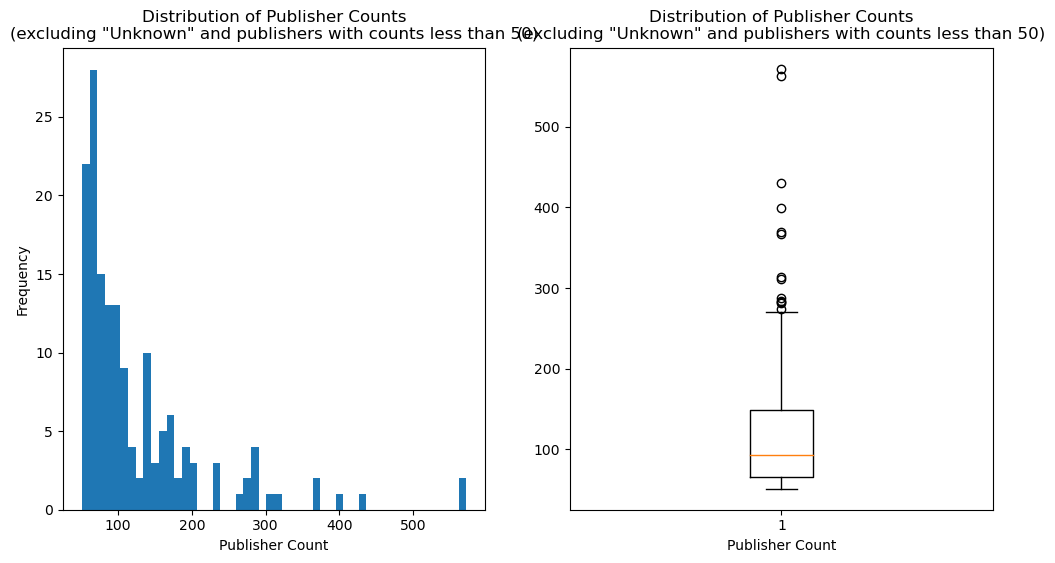

In [442]:
import matplotlib.pyplot as plt

# Filter out publishers with counts of 49 and 'Unknown' (just to visualize it better)
publisher_data = gr_data['publisher'].value_counts()
publisher_counts = publisher_data[(publisher_data.index != 'Unknown') & (publisher_data.values > 50)]

# Create figure with two subplots side-by-side
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# Create histogram on the left subplot
axs[0].hist(publisher_counts, bins=50)
axs[0].set_xlabel('Publisher Count')
axs[0].set_ylabel('Frequency')
axs[0].set_title(f'Distribution of Publisher Counts\n(excluding "Unknown" and publishers with counts less than 50)')

# Create box plot on the right subplot
axs[1].boxplot(publisher_counts)
axs[1].set_xlabel('Publisher Count')
axs[1].set_title(f'Distribution of Publisher Counts\n(excluding "Unknown" and publishers with counts less than 50)')

# Display the figure
plt.show()


In [443]:
# Information of filtered published data
display("Filtered data: ", publisher_counts.describe(),"Actual data: ", publisher_data.describe())

'Filtered data: '

count    157.000000
mean     125.452229
std       90.592738
min       51.000000
25%       66.000000
50%       93.000000
75%      149.000000
max      572.000000
Name: publisher, dtype: float64

'Actual data: '

count    11110.000000
mean         4.723492
std         39.691878
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       3696.000000
Name: publisher, dtype: float64

In [444]:
# Calculate percentiles
pct_25 = np.percentile(publisher_counts, 25)
pct_50 = np.percentile(publisher_counts, 50)
pct_75 = np.percentile(publisher_counts, 75)

In [445]:
# Count the number of unique publishers for each percentile criterion
unique_publishers_25 = len(gr_data['publisher'].value_counts()[gr_data['publisher'].value_counts() > pct_25])
unique_publishers_50 = len(gr_data['publisher'].value_counts()[gr_data['publisher'].value_counts() > pct_50])
unique_publishers_75 = len(gr_data['publisher'].value_counts()[gr_data['publisher'].value_counts() > pct_75])

print(f"Unique publishers for 25th percentile: {unique_publishers_25}")
print(f"Unique publishers for 50th percentile: {unique_publishers_50}")
print(f"Unique publishers for 75th percentile: {unique_publishers_75}")


Unique publishers for 25th percentile: 117
Unique publishers for 50th percentile: 78
Unique publishers for 75th percentile: 40


As in the original dataset 75% of publishers holds 2 or less counts of books, I've decided to bin all them in a new group.

In [446]:
# Group publishers with count less than pct_75 into "Other Publishers"
#gr_data.loc[gr_data['publisher'] < pct_75, 'publisher'] = 'Other Publishers'
gr_data.loc[gr_data['publisher'].isin(publisher_counts.index[publisher_counts.values < pct_75]) | (publisher_counts == 1), 'publisher'] = 'Other Publishers'


In [447]:
# New unique Publishers
gr_data['publisher'].value_counts()

Other Publishers                             9870
Unknown                                      3696
Vintage                                       572
HarperCollins                                 563
Penguin Books                                 430
                                             ... 
Council Oak Books                               1
Chicken House / Scholastic                      1
Applause Theatre & Cinema Book Publishers       1
Ahsyad Publications                             1
Bonneville                                      1
Name: publisher, Length: 10994, dtype: int64

## Publish Date and First Publish Date

In [448]:
gr_data[['publish_date','first_publish_date']]

,publish_date,first_publish_date
0,09/14/08,NaN
1,09/28/04,06/21/03
2,05/23/06,07-11-1960
3,10-10-2000,01/28/13
4,09-06-2006,10-05-2005
...,...,...
52473,May 28th 2011,NaN
52474,August 5th 2011,August 3rd 2011
52475,March 18th 2011,March 15th 2011
52476,September 1st 2011,April 5th 2011


In [449]:
gr_data['publish_date'].isna().sum()

880

In [501]:
dates = gr_data.copy()

In [502]:

def extract_year(date_str):
    if pd.isna(date_str):
        return np.nan
    else:
        # Clean up the date string
        date_str = date_str.replace('-', '/')
        date_str = date_str.replace('.', '')
        date_str = date_str.replace('th', '')
        
        for fmt in ("%m/%d/%y", "%m/%d/%Y", "%m-%d-%y", "%m-%d-%Y", "%B %d %Y", "%B %dth %Y",
                    "%B %dst %Y", "%B %dnd %Y", "%B %drd %Y", "%b %d %Y", "%b %dth %Y",
                    "%b %dst %Y", "%b %dnd %Y", "%b %drd %Y", "%d-%m-%y", "%d-%m-%Y",
                    "%d/%m/%y", "%d/%m/%Y", "%m.%d.%Y", "%m.%d.%y", "%Y/%m/%d", "%Y-%m-%d",
                    "%Y/%m/%d %H:%M:%S", "%Y/%m/%d %H:%M", "%Y/%m/%d %I:%M:%S %p",
                    "%Y/%m/%d %I:%M %p", "%Y.%m.%d", "%Y-%m-%d %H:%M:%S",
                    "%Y-%m-%d %H:%M:%S.%f", "%Y-%m-%d %H:%M", "%Y-%m-%d %I:%M:%S %p",
                    "%Y-%m-%d %I:%M %p", "%Y.%m.%d %H:%M:%S", "%Y.%m.%d %H:%M",
                    "%Y.%m.%d %I:%M:%S %p", "%Y.%m.%d %I:%M %p"):
            try:
                dt = pd.to_datetime(date_str, format=fmt)
                return dt.year
            except ValueError:
                pass
        return np.nan


In [503]:
# Apply the function to the columns 'publish_date' and 'first_publish_date'
dates['publish_year'] = dates['publish_date'].apply(extract_year)
dates['first_publish_year'] = dates['first_publish_date'].apply(extract_year)

In [496]:
# If one of the columns has NaN, copy the value from the other column
dates['publish_year'].fillna(dates['first_publish_year'], inplace=True)
dates['first_publish_year'].fillna(dates['publish_year'], inplace=True)

In [504]:
# Drop the original columns
dates.drop(['publish_date', 'first_publish_date'], axis=1, inplace=True)

In [505]:
# Checking results
dates[['publish_year','first_publish_year']]

,publish_year,first_publish_year
0,2008.0,NaN
1,2004.0,2003.0
2,2006.0,1960.0
3,2000.0,2013.0
4,2006.0,2005.0
...,...,...
52473,2011.0,NaN
52474,2011.0,2011.0
52475,2011.0,2011.0
52476,2011.0,2011.0


In [508]:
# If one of the columns has NaN, copy the value from the other column
mask = dates['publish_year'].isnull() | dates['first_publish_year'].isnull()
dates.loc[mask, 'publish_year'] = dates['publish_year'].fillna(dates['first_publish_year'])
dates.loc[mask, 'first_publish_year'] = dates['first_publish_year'].fillna(dates['publish_year'])

# Replace the remaining NaN values with 0
dates.fillna(0, inplace=True)

# Convert the year columns to integers
dates['publish_year'] = dates['publish_year'].astype(int)
dates['first_publish_year'] = dates['first_publish_year'].astype(int)

In [509]:
# Checking results
dates[['publish_year','first_publish_year']]

,publish_year,first_publish_year
0,2008,2008
1,2004,2003
2,2006,1960
3,2000,2013
4,2006,2005
...,...,...
52473,2011,2011
52474,2011,2011
52475,2011,2011
52476,2011,2011


In [512]:
# NaN values
dates[['publish_year', 'first_publish_year']].isna().sum()

publish_year          0
first_publish_year    0
dtype: int64

In [513]:
# Add new columns with years to main dataframe
gr_data = pd.concat([gr_data, dates[['publish_year', 'first_publish_year']]], axis=1)

In [518]:
# Drop original columns
gr_data = gr_data.drop(['publish_date', 'first_publish_date'], axis=1)

In [519]:
gr_data.shape

(52478, 628)

In [520]:
gr_data.to_csv('gr_modified_years.csv')

## Awards

In [521]:
gr_data = pd.read_csv('gr_modified_years.csv')

### ISBN

In [ ]:
gr_data['isbn']

In [ ]:
for value in gr_data['isbn']:
    try:
        float(value)
    except ValueError:
        print(f"Value {value} could not be converted to a float")

In [ ]:
gr_data.head()

In [ ]:
isbn = int(float('9.78044E+12'))
print(isbn)


In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import random

def extract_isbn(row):
    # Check if the isbn column contains a string in scientific notation format
    try:
        isbn_num = int(row['isbn'])
        isbn_str = str(isbn_num)
        if len(isbn_str) == 10 or len(isbn_str) == 13:
            return isbn_str
    except ValueError:
        pass
    
    # If the isbn column does not contain a valid ISBN, extract it from the Amazon product page
    amazon_id = row['isbn']
    url = f'https://www.amazon.com/dp/{amazon_id}'
    response = requests.get(url)
    
    # Sleep for a random time between 1 and 3 seconds
    time.sleep(random.uniform(1, 3))
    
    soup = BeautifulSoup(response.content, 'html.parser')
    
    isbn_tags = soup.select('#detailBullets_feature_div li:-soup-contains("ISBN-10") span.a-text-bold, #detailBullets_feature_div li:-soup-contains("ISBN-13") span.a-text-bold')
    if isbn_tags:
        return isbn_tags[0].text.strip().replace('-', '')
    else:
        return None


In [ ]:
#gr_data['isbn'] = gr_data.apply(extract_isbn, axis=1)

In [ ]:
gr_data['isbn']